# Семинар 6. Решающие деревья

![](https://i0.wp.com/docs.microsoft.com/en-us/azure/machine-learning/studio/media/algorithm-choice/image5.png?resize=495%2C706&ssl=1)

*Source: https://www.upnxtblog.com/index.php/2017/12/06/17-machine-learning-algorithms-that-you-should-know/*

Сами по себе решающие деревья используются в машинном обучении относительно редко, однако очень распространены методы, основанные на их композиции - ансамблях (Random Forest, XGBoost, LightGBM, CatBoost).

## Линейные модели или решающие деревья?

Можно ли сказать, что какой-то из этих двух типов моделей всегда лучше? Нет. В зависимости от пространственной структуры данных, один из них будет работать лучше:

- Линейная модель, если данные хорошо линейно разделимы

- Решающие деревья, если данные плохо линейно разделимы (присутствуют только кусочно-линейные или нелинейные зависимости)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (11, 6.5)

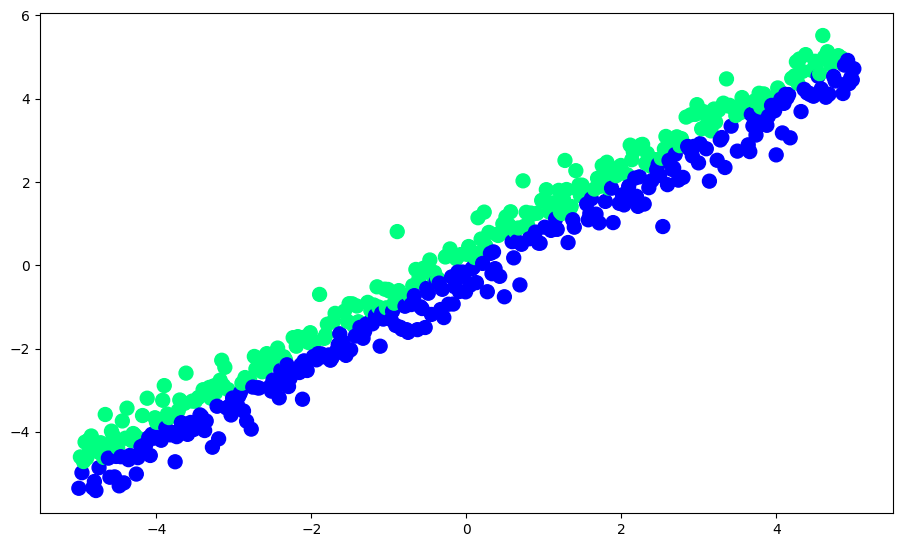

In [2]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr, y_test):.2f}")

Linear model accuracy: 0.99


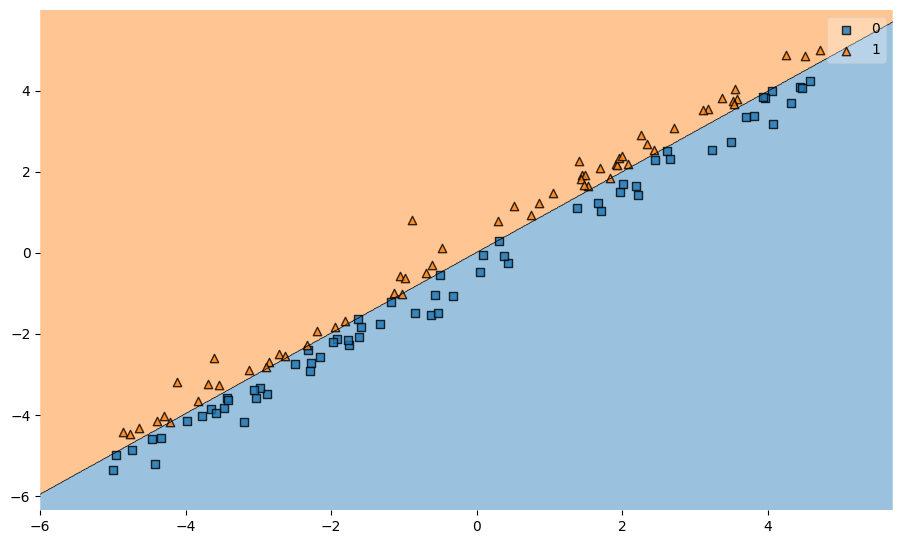

In [4]:
# !pip install mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, lr)
plt.show()

Decision tree accuracy: 0.86


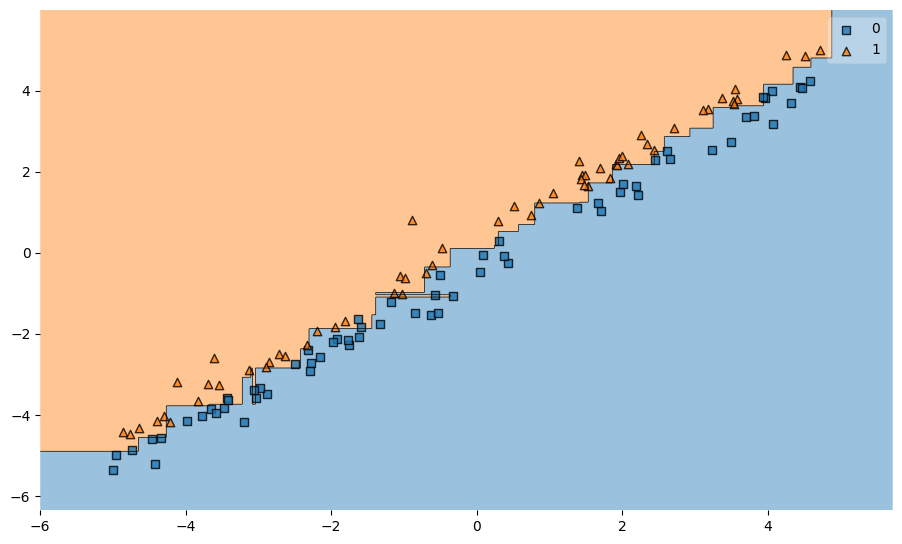

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt)
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00
Catboost accuracy: 0.90


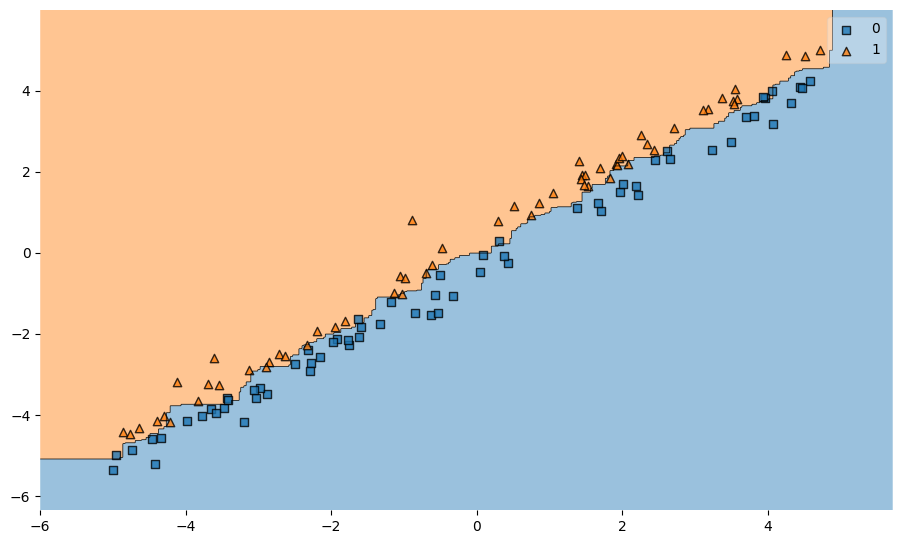

In [6]:
#!pip install catboost
from catboost import CatBoostClassifier

dt = CatBoostClassifier(random_state=13, verbose=False)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f"Catboost accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt)
plt.show()

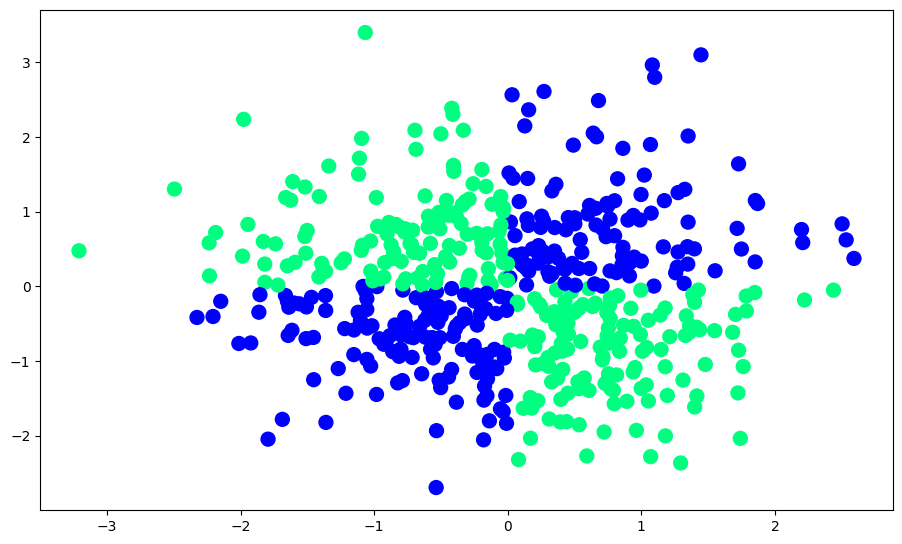

In [7]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

Linear model accuracy: 0.39


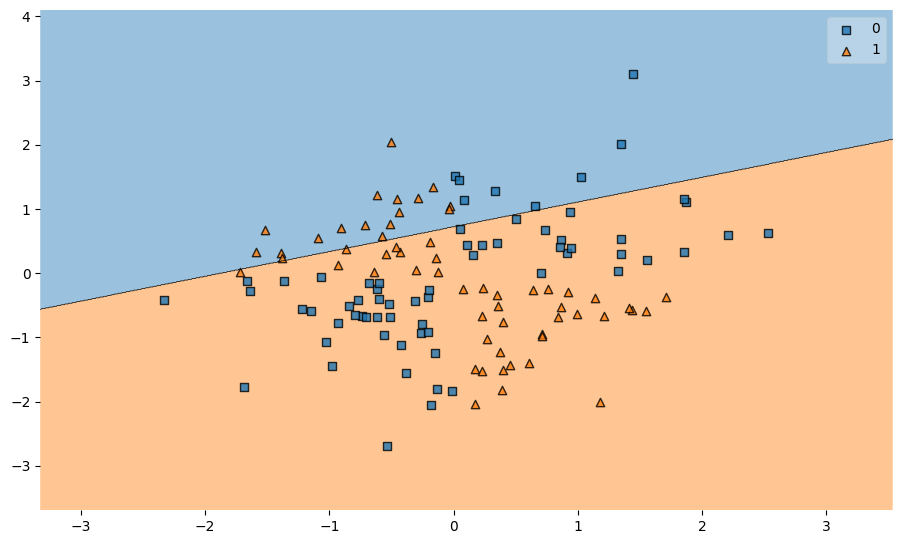

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_lr, y_test):.2f}")

plot_decision_regions(X_test, y_test, lr)
plt.show()

Decision tree accuracy: 0.97


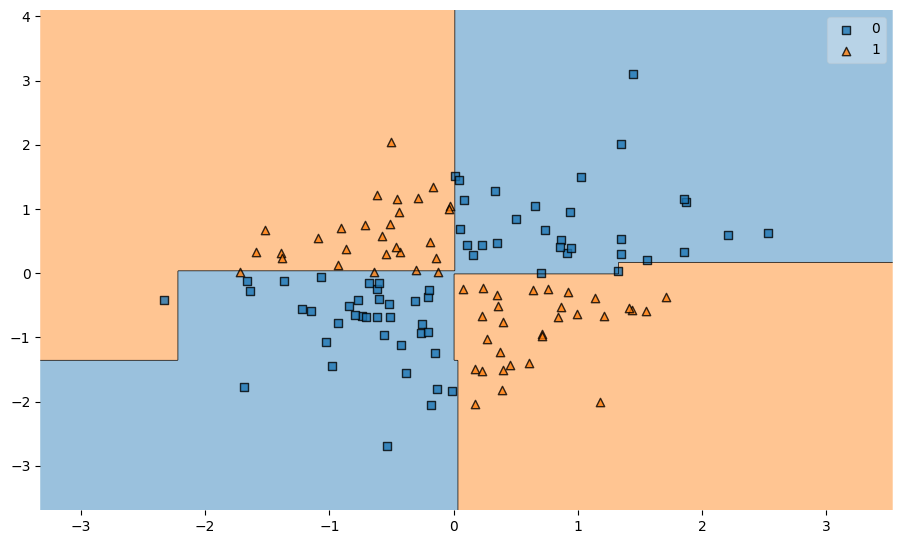

In [9]:
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt)
plt.show()

Catboost accuracy: 0.99


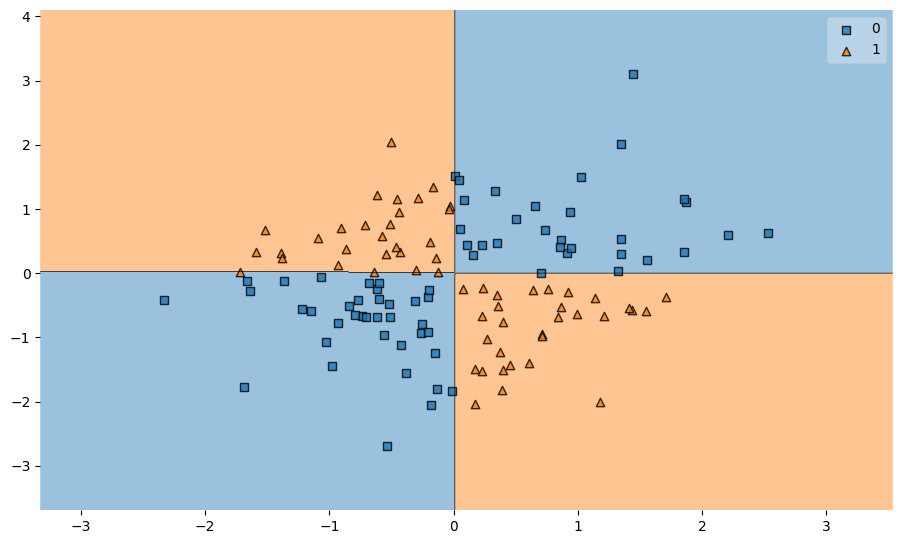

In [10]:
dt = CatBoostClassifier(random_state=13, verbose=False)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Catboost accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt)
plt.show()

## Переобучение

Без регуляризации решающие деревья обладают фантастической способность к переобучению: можно построить решающее дерево, которое имеет нулевую ошибку на данной выборке, выделив для каждого объекта отдельный листик.

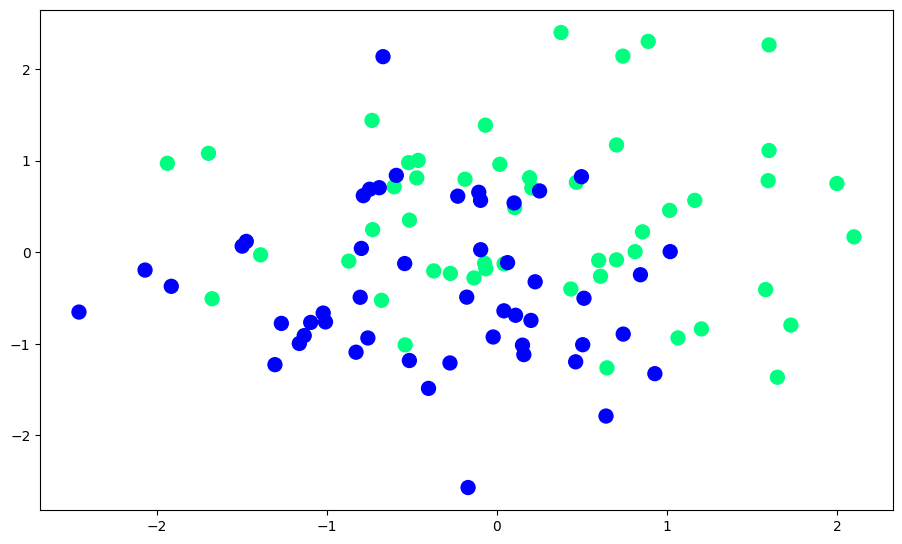

In [11]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="winter")
plt.show()

Посмотрим, как влияют разные значения гиперпараметров решающего дерева на его структуру:

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она могла быть листовой. Другими словами, когда мы будем перебирать пороги для разбиения в конкретной вершине, мы будем рассматривать только такие пороги, после разбиения по которым каждая из двух новых вершин будет содержать не менее `min_samples_leaf` объектов.
- `min_samples_split`: минимальное число объектов во внутреннем узле, при котором мы будем делать разбиение этого листа.

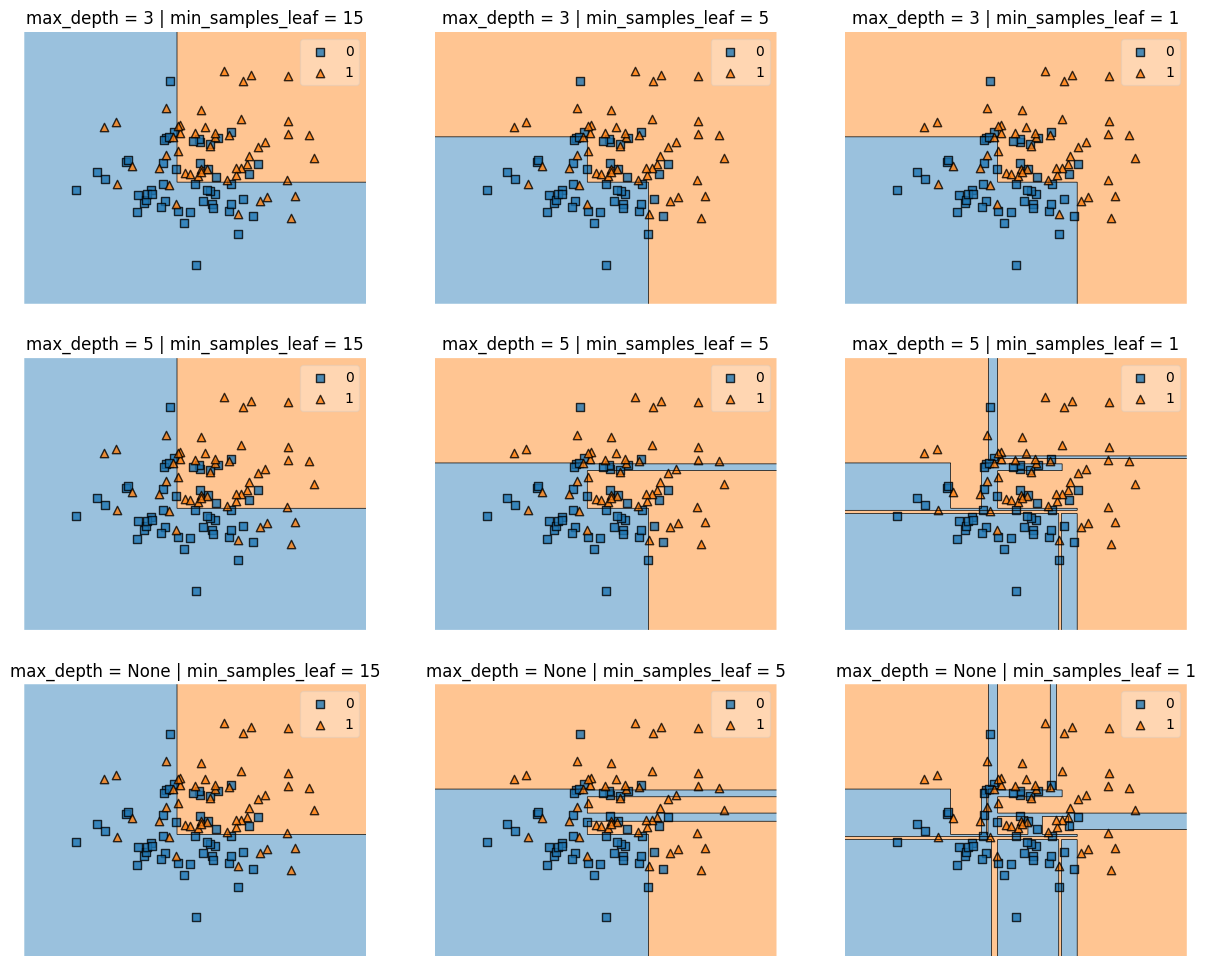

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title("max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf))
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

Decision tree accuracy: 1.00


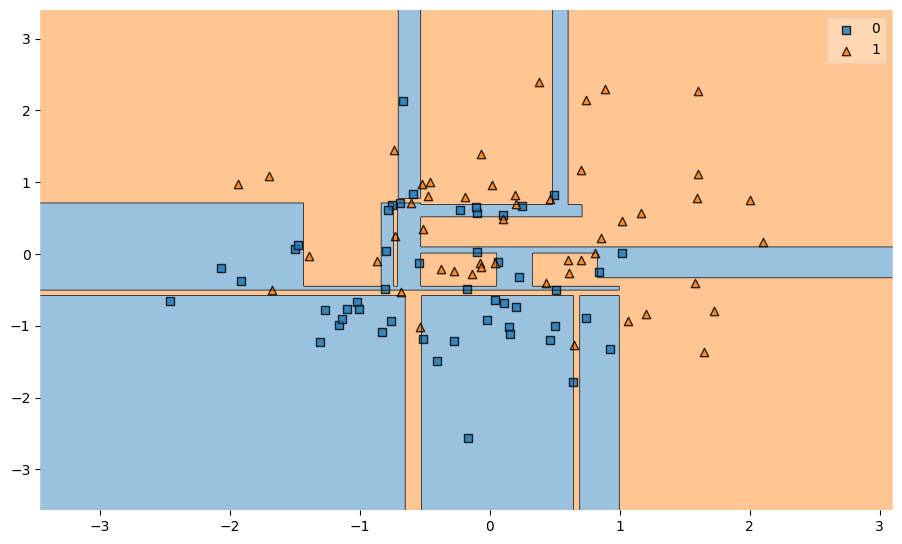

In [13]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=13)
dt.fit(X, y)

print(f"Decision tree accuracy: {accuracy_score(y, dt.predict(X)):.2f}")

plot_decision_regions(X, y, dt)
plt.show()

## Неустойчивость

Посмотрим, как будет меняться структура дерева без регуляризации, если брать для обучения разные 90%-ые подвыборки исходной выборки.

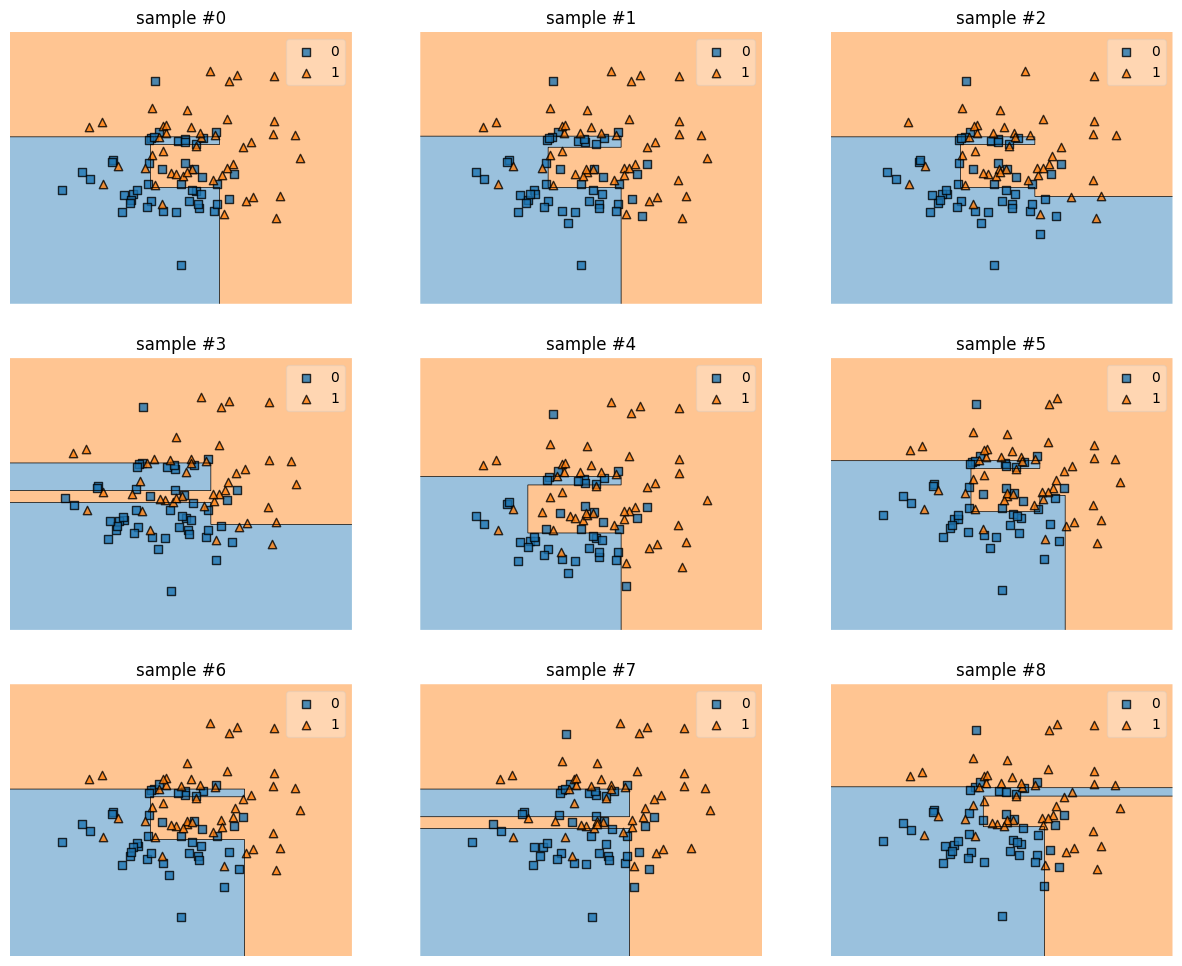

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])

plt.show()

## Решающее дерево из sklearn

In [15]:
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [16]:
housing = fetch_california_housing()

In [17]:
X = pd.DataFrame(data=housing["data"], columns=housing["feature_names"])
y = housing["target"]

In [18]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [19]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
X.shape

(20640, 8)

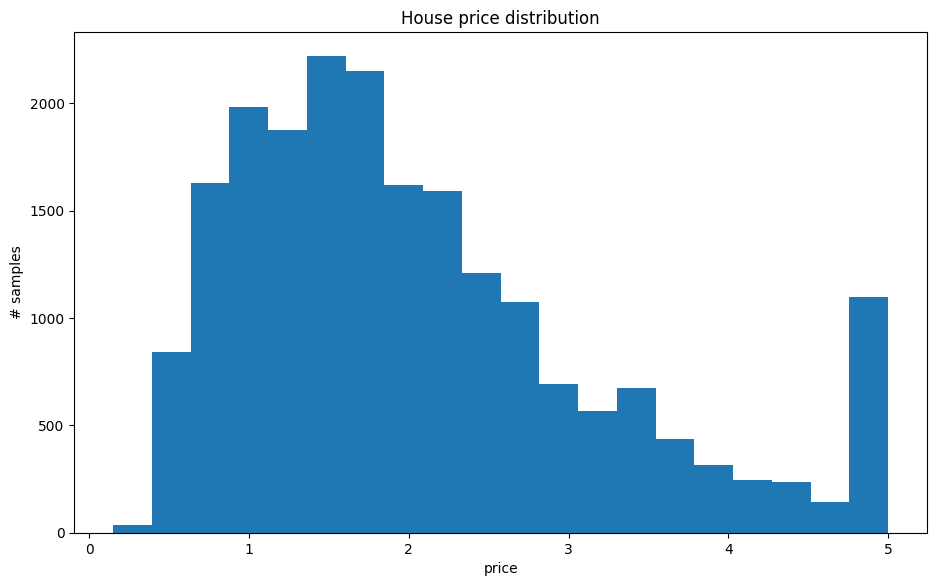

In [21]:
plt.title("House price distribution")
plt.xlabel("price")
plt.ylabel("# samples")
plt.hist(y, bins=20)
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

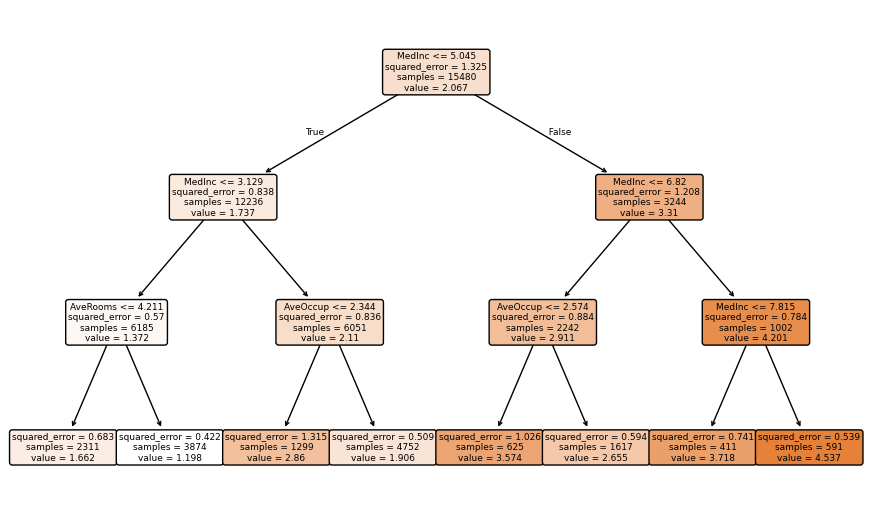

In [23]:
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

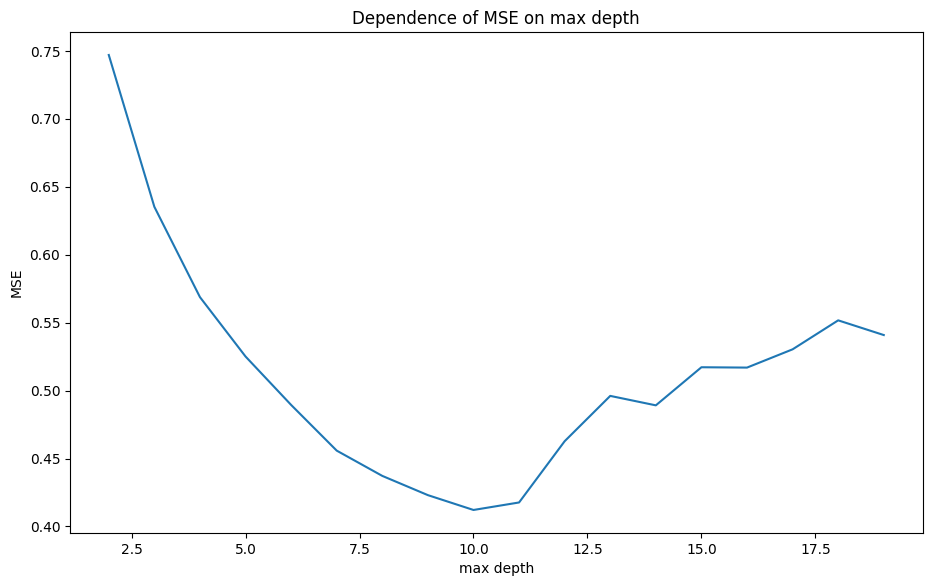

In [24]:
max_depth_array = range(2, 20)
mse_array = []

for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(max_depth_array, mse_array)
plt.title("Dependence of MSE on max depth")
plt.xlabel("max depth")
plt.ylabel("MSE")
plt.show()

In [25]:
pd.DataFrame({
    "max_depth": max_depth_array,
    "MSE": mse_array
}).sort_values(by="MSE").reset_index(drop=True)

,max_depth,MSE
0,10,0.412125
1,11,0.417647
2,9,0.423044
3,8,0.437202
4,7,0.455806
5,12,0.462736
6,14,0.489129
7,6,0.489436
8,13,0.496086
9,16,0.516918


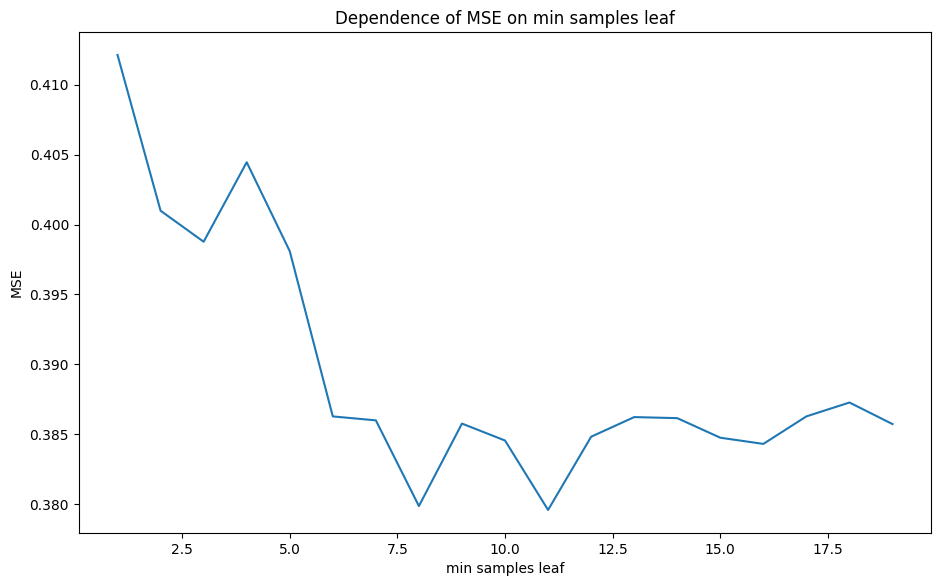

In [26]:
min_samples_leaf_array = range(1, 20)
mse_array = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(min_samples_leaf_array, mse_array)
plt.title("Dependence of MSE on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("MSE")
plt.show()

In [27]:
pd.DataFrame({
    "min_samples_leaf": min_samples_leaf_array,
    "MSE": mse_array
}).sort_values(by="MSE").reset_index(drop=True)

,min_samples_leaf,MSE
0,11,0.379583
1,8,0.379863
2,16,0.384309
3,10,0.384550
4,15,0.384751
5,12,0.384821
6,19,0.385725
7,9,0.385761
8,7,0.385992
9,14,0.386150


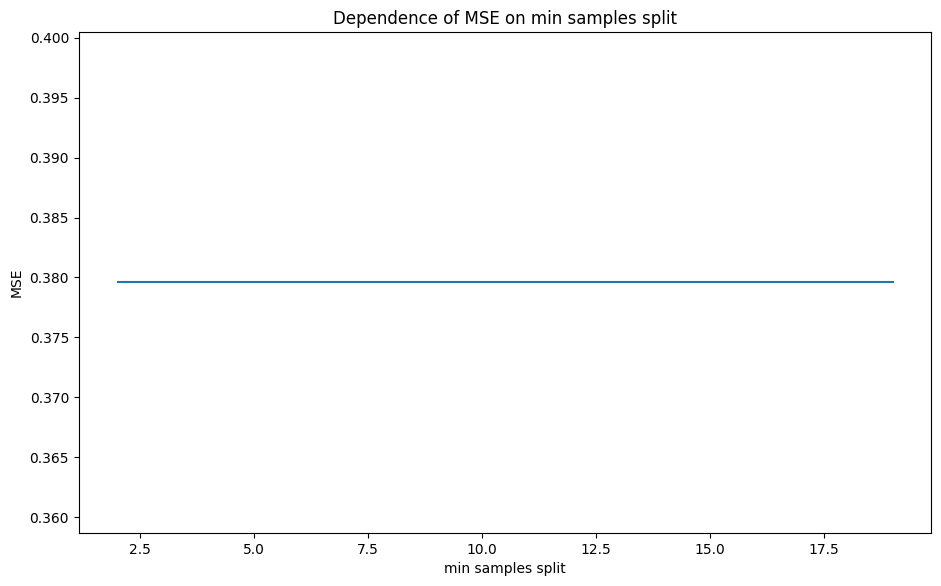

In [28]:
min_samples_split_array = range(2, 20)
mse_array = []

for min_samples_split in min_samples_split_array:
    dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=11, min_samples_split=min_samples_split, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(min_samples_split_array, mse_array)
plt.title("Dependence of MSE on min samples split")
plt.xlabel("min samples split")
plt.ylabel("MSE")
plt.show()

In [29]:
pd.DataFrame({
    "min_samples_split": min_samples_split_array,
    "MSE": mse_array
}).sort_values(by="MSE").reset_index(drop=True)

,min_samples_split,MSE
0,2,0.379583
1,17,0.379583
2,16,0.379583
3,15,0.379583
4,14,0.379583
5,13,0.379583
6,12,0.379583
7,11,0.379583
8,10,0.379583
9,9,0.379583


In [30]:
%%time
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=13),
                  param_grid={
                      'max_features': ['auto', 'log2', 'sqrt'],
                      'max_depth': list(range(2, 20)) + [None],
                      'min_samples_leaf': list(range(1, 20)) + [None]
                  },
                  cv=5,
                  scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

CPU times: user 2min 32s, sys: 269 ms, total: 2min 32s
Wall time: 2min 35s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=13),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, None],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              None]},
             scoring='neg_mean_squared_error')

In [31]:
gs.best_params_

{'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 13}

0.4894363278261739


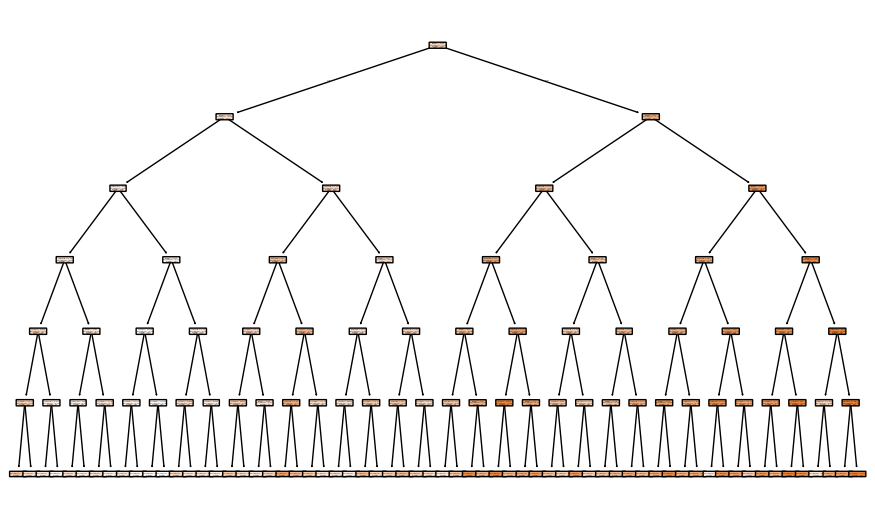

In [32]:
dt_our_best = DecisionTreeRegressor(max_depth=6, random_state=13)
dt_our_best.fit(X_train, y_train)
print(mean_squared_error(y_test, dt_our_best.predict(X_test)))

plot_tree(dt_our_best, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [33]:
dt_gs_best = DecisionTreeRegressor(max_depth=14,  min_samples_leaf=13, random_state=13)
dt_gs_best.fit(X_train, y_train)
mean_squared_error(y_test, dt_gs_best.predict(X_test))

0.37514221932994596

### Важность признаков

In [34]:
df_importances = pd.DataFrame({
    "feature": X.columns,
    "importance": dt.feature_importances_
}).sort_values(by="importance", ascending=False).reset_index(drop=True)

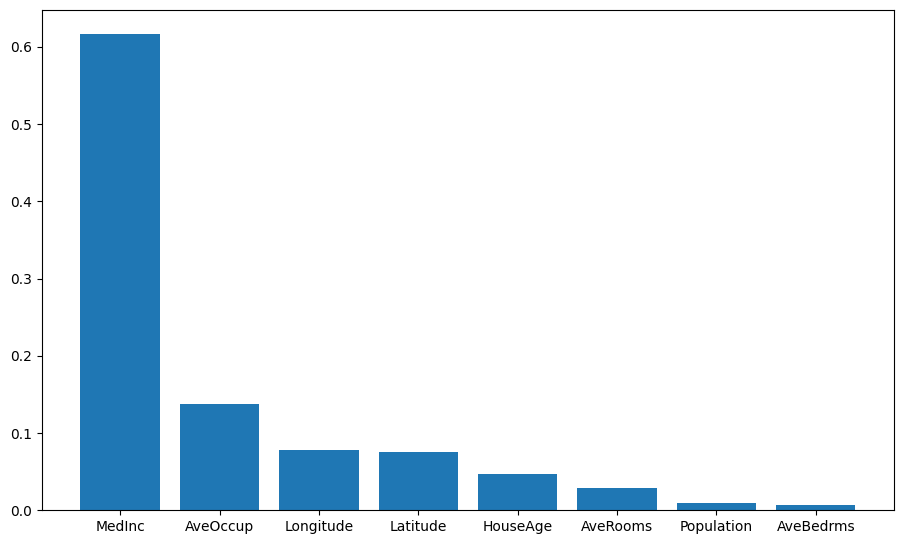

In [35]:
plt.bar(df_importances['feature'], df_importances['importance'])
plt.show()

Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5707,-0.181483,0.579137,-0.340021,-0.004463,-0.065383,-0.087113,-0.671762,0.675607
3754,-0.468327,0.579137,-0.436304,-0.200565,-0.187060,0.012248,-0.685728,0.605994
11866,-1.141668,-1.409735,6.179161,7.136066,-1.184805,-0.125634,2.112156,-0.741514
19325,-0.077775,1.613350,0.300554,0.408878,-0.805871,-0.030340,1.339362,-1.666371
1962,-0.495137,-0.932406,0.266794,0.063914,-0.495596,-0.054477,1.432470,-0.557537


In [37]:
print("No scaling is applied\n")

for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(f"MSE on test set for depth {max_depth}: {mean_squared_error(y_test, dt.predict(X_test)):.2f}")

No scaling is applied

MSE on test set for depth 3: 0.64
MSE on test set for depth 6: 0.49


In [38]:
print("Standard scaling is applied\n")

for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(f"MSE on test set for depth {max_depth}: {mean_squared_error(y_test, dt.predict(X_test_scaled)):.2f}")

Standard scaling is applied

MSE on test set for depth 3: 0.64
MSE on test set for depth 6: 0.49


## Бонусная часть

Давайте посмотрим, как работает стрижка (cost-complexity pruning) для снижения переобучения деревьев.

Источник: [ноутбук](https://colab.research.google.com/drive/1SGGaIGgo1wOsvBdPfiBb0128emHnu3Oo?usp=sharing).

Похожий источник: [ноутбук](https://github.com/Fennec120/ds_junior/blob/main/module_11/11.1%20Decision_Trees.ipynb).

Вы уже знаете, что решающие деревья способны переобучиться под любую выборку, если их никак не регуляризовать: при большом количестве листьев для каждого объекта может выделиться своя область в признаковом пространстве. По сути дерево просто выучивает обучающую выборку, но не выделяет никаких закономерностей среди данных.

Посмотрим на этот эффект на реальных данных и попробуем его уменьшить.

Будем решать задачу классификации на примере известного датасета о цветках ирисов.

В этом датасете каждый объект (цветок) имеет четыре числовые характеристики:

* длина и ширина лепестка;
* длина и ширина чашелистика.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)

X = data.data[['sepal length (cm)', 'sepal width (cm)']]
y = data.target

In [40]:
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [43]:
tree.get_depth()

10

In [44]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_train_pred), round(accuracy_score(y_test, y_test_pred), 2))

0.95 0.63


Мы видим, что accuracy на обучающих данных очень большая, при этом на тестовых сильно ниже. Наблюдаем сильное переобучение.

Используем прунинг для уменьшения количества вершин в дереве и, следовательно, для снижения переобучения.

Прунинг при обучении дерева использует регуляризованный функционал
$$Q_{\alpha}(T) = Q(T) + \alpha |T|,$$
где $T$ - дерево, $Q(T)$ - функция потерь, $|T|$ - число вершин в дереве.

В sklearn есть Cost-Complexity pruning, который возвращает список возможных порогов $\alpha$ при построении дерева (т.к. данных конечное число, то не нужно рассматривать бесконечное число значений).

In [45]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

alphas

array([0.        , 0.00277778, 0.00277778, 0.00277778, 0.00324074,
       0.00518519, 0.00555556, 0.00694444, 0.00743464, 0.01006944,
       0.01041667, 0.01161038, 0.01230159, 0.01581699, 0.02010944,
       0.05683866, 0.06089286, 0.20756944])

Чем больше $\alpha$, тем сильнее регуляризация, и тем меньше дерево переобучается.

Посмотрим на зависимость качества предсказания дерева на тренировочных и тестовых данных в зависимости от $\alpha$.

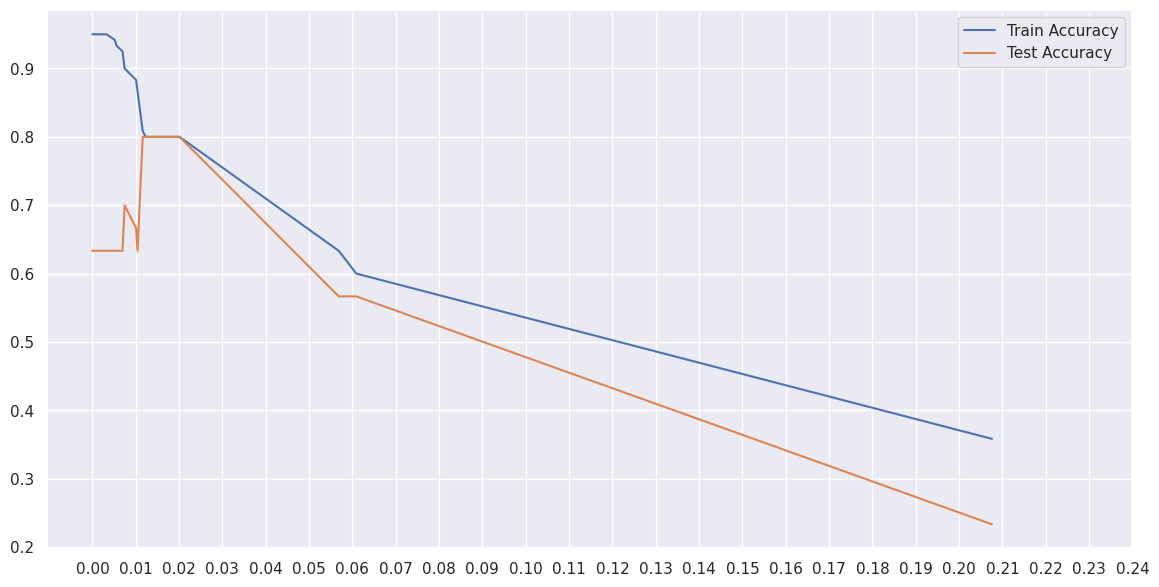

In [46]:
accuracy_train,accuracy_test = [],[]

for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha = i)

    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))


sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y = accuracy_train, x = alphas, label = "Train Accuracy")
sns.lineplot(y = accuracy_test, x = alphas, label = "Test Accuracy")
plt.xticks(ticks = np.arange(0.00,0.25,0.01))
plt.show()

Мы видим, что при регуляризации с $\alpha\in[0.01;0.02]$ получаем наилучшее качество на тестовых данных.

То есть прунинг действительно помогает справиться с переобучением и повысить предсказательную способность дерева.

Посчитаем метрики на трейне и тесте для $\alpha=0.02$.

In [47]:
tree = DecisionTreeClassifier(ccp_alpha = 0.02, random_state = 40)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))

0.8 0.8


Итак, при помощи прунинга удалось значительно снизить переобучение дерева и повысить качество предсказания на тестовых данных.